# PREDICTING EMPLOYEE CHURN

In [1]:
import pandas as pd

In [2]:
hr_df=pd.read_csv(r"C:\Users\Abhishek\Downloads\hr_data.csv")

In [3]:
hr_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [4]:
#Nnumeric analysis

In [5]:
hr_df.size

134991

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [7]:
hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
#loading the employee satisfaction data

In [10]:
s_df=pd.read_excel(r'C:\Users\Abhishek\Downloads\employee_satisfaction_evaluation.xlsx')

In [11]:
s_df

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [12]:
#Merging and joining

In [13]:
main_df=hr_df.set_index('employee_id').join(s_df.set_index("EMPLOYEE #"))

In [14]:
main_df=main_df.reset_index()

In [15]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [16]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
satisfaction_level       14972 non-null float64
last_evaluation          14972 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [17]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [18]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
main_df.fillna(main_df.mean(),inplace=True)

In [20]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [21]:
main_df.iloc[18]

employee_id                  3794
number_project                  2
average_montly_hours          160
time_spend_company              3
Work_accident                   1
left                            1
promotion_last_5years           1
department                  sales
salary                        low
satisfaction_level        0.61283
last_evaluation          0.716125
Name: 18, dtype: object

In [22]:
main_df.drop(columns='employee_id',inplace=True)

In [23]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [24]:
main_df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [25]:
main_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [26]:
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [27]:
#Data visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

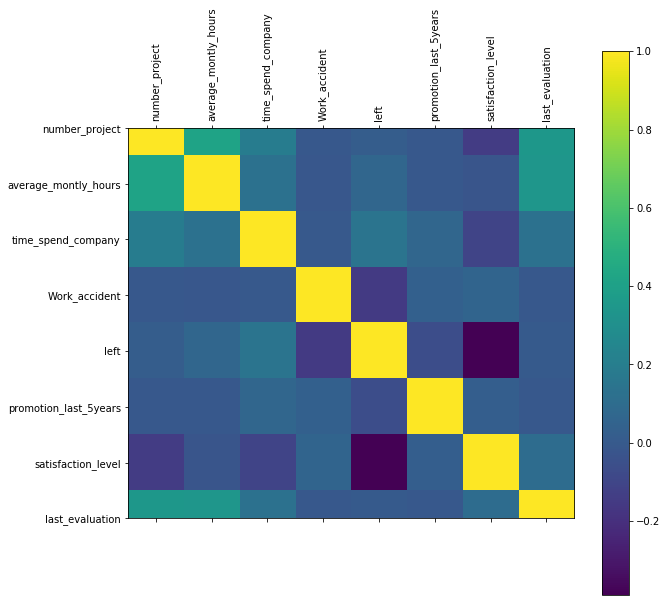

In [29]:
def plot_corr(df):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(10,10))
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
plot_corr(main_df)    

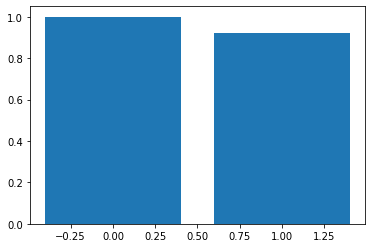

In [30]:
plt.bar(x=main_df["left"],height=main_df["satisfaction_level"])
plt.show()

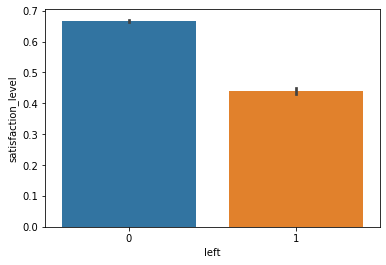

In [31]:
sns.barplot(x='left',y='satisfaction_level',data=main_df)
plt.show()

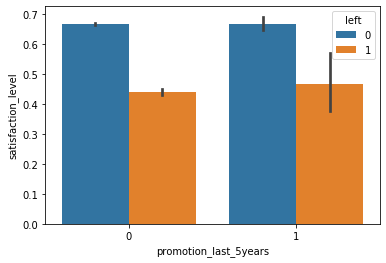

In [32]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=main_df,hue='left')
plt.show()

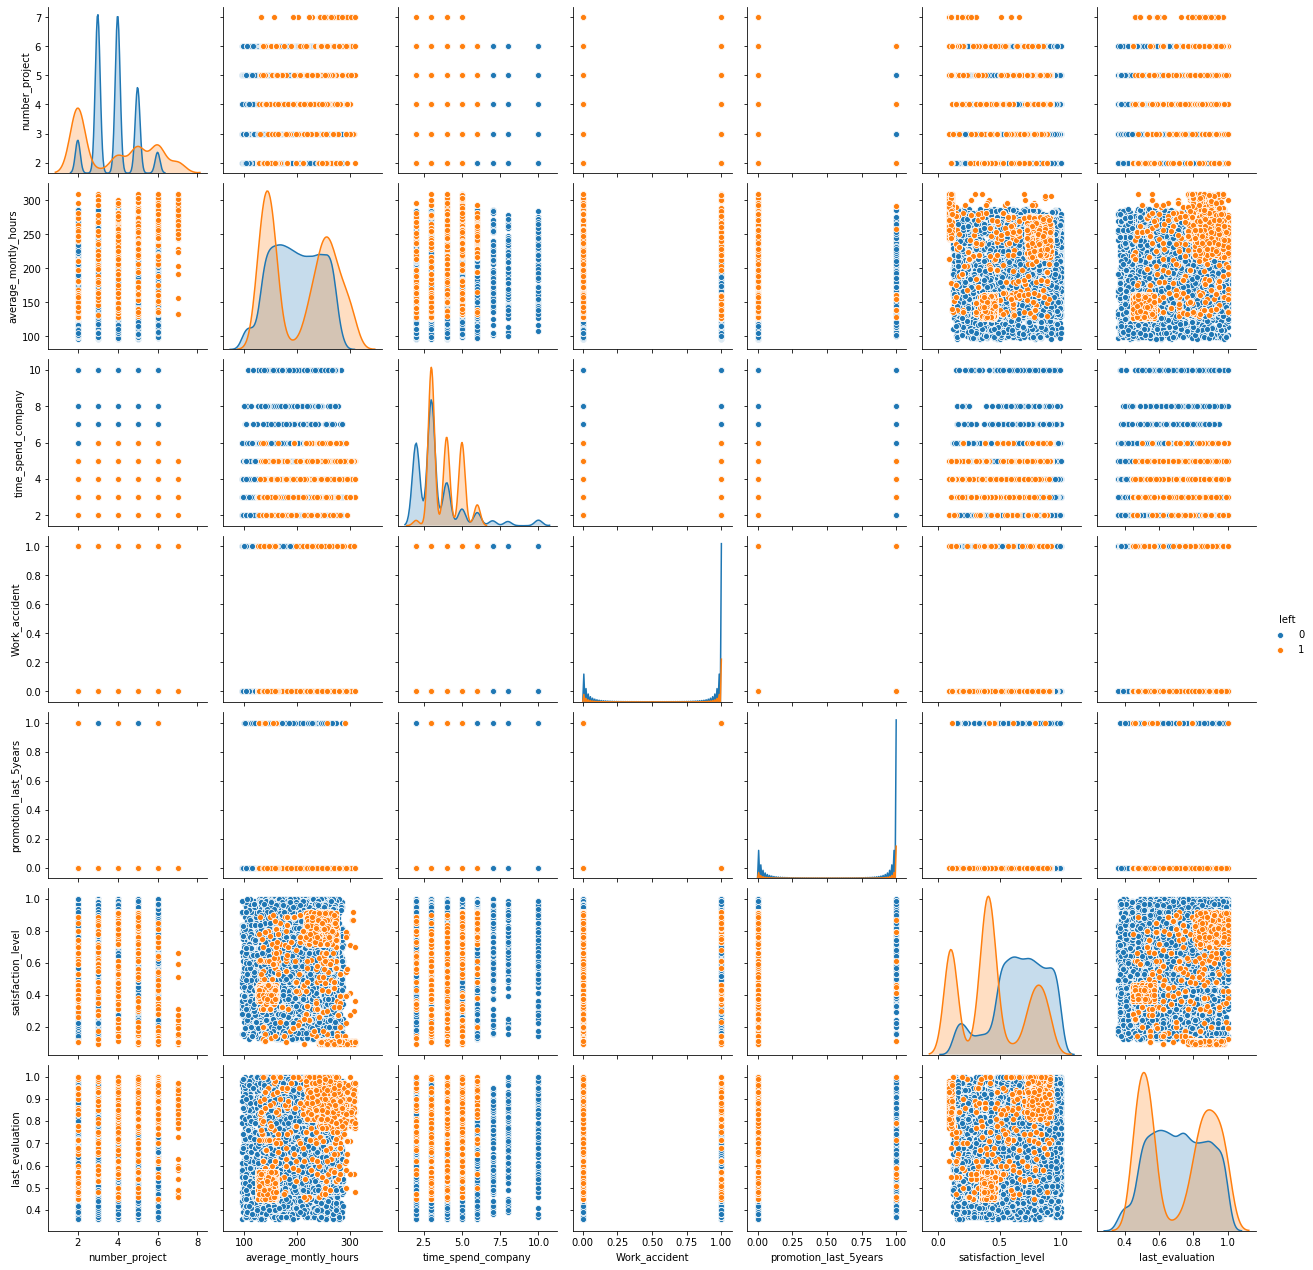

In [33]:
sns.pairplot(main_df,hue='left')
plt.show()

In [34]:
#Data preprocessing

In [35]:
y= main_df[['department','salary']]

In [36]:
y

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
k=le.fit_transform(main_df['salary'])

In [38]:
k

array([1, 2, 2, ..., 1, 1, 1])

In [39]:
main_df['salary_num']=k

In [40]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
0,2,157,3,0,1,0,sales,low,0.38,0.53,1
1,5,262,6,0,1,0,sales,medium,0.80,0.86,2
2,7,272,4,0,1,0,sales,medium,0.11,0.88,2
3,5,223,5,0,1,0,sales,low,0.72,0.87,1
4,2,159,3,0,1,0,sales,low,0.37,0.52,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57,1
14995,2,160,3,0,1,0,support,low,0.37,0.48,1
14996,2,143,3,0,1,0,support,low,0.37,0.53,1
14997,6,280,4,0,1,0,support,low,0.11,0.96,1


In [41]:
z=le.fit_transform(main_df['department'])

In [42]:
main_df['department_num']=z
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,sales,low,0.38,0.53,1,7
1,5,262,6,0,1,0,sales,medium,0.80,0.86,2,7
2,7,272,4,0,1,0,sales,medium,0.11,0.88,2,7
3,5,223,5,0,1,0,sales,low,0.72,0.87,1,7
4,2,159,3,0,1,0,sales,low,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57,1,8
14995,2,160,3,0,1,0,support,low,0.37,0.48,1,8
14996,2,143,3,0,1,0,support,low,0.37,0.53,1,8
14997,6,280,4,0,1,0,support,low,0.11,0.96,1,8


In [43]:
exc=main_df[['department','department_num','salary','salary_num']]

In [44]:
a1=exc['department'].unique()
a1

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [45]:
a2=exc['department_num'].unique()
a2

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1], dtype=int64)

In [46]:
a3=exc['salary'].unique()
a3

array(['low', 'medium', 'high'], dtype=object)

In [47]:
a4=exc['salary_num'].unique()
a4

array([1, 2, 0], dtype=int64)

In [94]:
exc_main1=pd.DataFrame(a2,a1)
exc_main1

,0
sales,7
accounting,2
hr,3
technical,9
support,8
management,4
IT,0
product_mng,6
marketing,5
RandD,1


In [88]:
exc_main2=pd.DataFrame(a4,a3)
exc_main2

,0
low,1
medium,2
high,0


In [50]:
main_df.drop(['department','salary'],axis=1,inplace=True)
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,1,8
14995,2,160,3,0,1,0,0.37,0.48,1,8
14996,2,143,3,0,1,0,0.37,0.53,1,8
14997,6,280,4,0,1,0,0.11,0.96,1,8


In [51]:
x = main_df.drop(['left'],axis=1)
x

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,0,0.38,0.53,1,7
1,5,262,6,0,0,0.80,0.86,2,7
2,7,272,4,0,0,0.11,0.88,2,7
3,5,223,5,0,0,0.72,0.87,1,7
4,2,159,3,0,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,0,0.40,0.57,1,8
14995,2,160,3,0,0,0.37,0.48,1,8
14996,2,143,3,0,0,0.37,0.53,1,8
14997,6,280,4,0,0,0.11,0.96,1,8


In [52]:
y = main_df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [54]:
X_train

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
5363,5,103,6,0,0,0.29,0.80,2,7
708,6,255,4,0,0,0.11,0.87,1,7
14832,6,247,4,0,0,0.10,0.86,2,7
3670,5,176,3,0,0,0.49,0.92,1,5
5741,4,190,5,0,0,0.59,0.39,2,7
...,...,...,...,...,...,...,...,...,...
2959,2,197,4,0,0,0.55,0.82,1,9
417,6,264,4,0,0,0.11,0.90,2,9
9166,6,98,3,0,0,0.84,0.52,1,5
7913,4,134,5,1,0,0.84,0.98,2,8


In [55]:
y_train

5363     0
708      1
14832    1
3670     0
5741     0
        ..
2959     0
417      1
9166     0
7913     0
2675     0
Name: left, Length: 10499, dtype: int64

In [56]:
#Decision tree classifier

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
prediction_dt = dt.predict(X_test)

In [60]:
prediction_dt

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [61]:
prediction_dt.size

4500

In [62]:
accuracy_dt = accuracy_score(prediction_dt,y_test)*100
accuracy_dt

97.6888888888889

In [66]:
custom_dt=[[10,500,10,6,4,0.9,0.8,0,6]]

In [67]:
custom_pred = dt.predict(custom_dt)

In [68]:
custom_pred

array([0], dtype=int64)

In [69]:
category = ['employee will stay' , 'employee will leave']

In [70]:
category[int(custom_pred)]

'employee will stay'

In [73]:
dt.feature_importances_

array([1.11442106e-01, 1.02720984e-01, 1.43912215e-01, 3.17906014e-03,
       2.21397375e-05, 4.87147071e-01, 1.36107862e-01, 4.70454569e-03,
       1.07640165e-02])

In [106]:
feat_imprt = pd.DataFrame(dt.feature_importances_,index=X_train.columns,columns=['Importance']).sort_values(['Importance'],ascending=False)

In [107]:
feat_imprt

,Importance
satisfaction_level,0.487147
time_spend_company,0.143912
last_evaluation,0.136108
number_project,0.111442
average_montly_hours,0.102721
department_num,0.010764
salary_num,0.004705
Work_accident,0.003179
promotion_last_5years,0.000022


In [108]:
#KNN 

In [109]:
#Standerd Scaling 

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [113]:
X_train_std

array([[ 0.98215784, -1.9692935 ,  1.69466209, ...,  0.49190567,
         1.04371781,  0.39578857],
       [ 1.7985362 ,  1.08108892,  0.33340909, ...,  0.90260978,
        -0.5522614 ,  0.39578857],
       [ 1.7985362 ,  0.92054248,  0.33340909, ...,  0.84393777,
         1.04371781,  0.39578857],
       ...,
       [ 1.7985362 , -2.06963502, -0.3472174 , ..., -1.15091077,
        -0.5522614 , -0.30136506],
       [ 0.16577947, -1.34717603,  1.01403559, ...,  1.54800196,
         1.04371781,  0.74436538],
       [ 0.16577947,  0.2582884 , -0.3472174 , ...,  1.07862583,
         1.04371781,  1.09294219]])

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [123]:
prediction_knn= knn.predict(X_test_std)

In [125]:
accuracy_knn = accuracy_score(y_test,prediction_knn)*100

In [126]:
accuracy_knn

96.08888888888889

In [128]:
k_range = range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    prediction_knn = knn.predict(X_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)*100
    scores_list.append(accuracy_score(y_test,prediction_knn)*100)

In [130]:
scores

{1: 96.75555555555555,
 2: 96.22222222222221,
 3: 96.08888888888889,
 4: 96.0,
 5: 95.73333333333333,
 6: 95.95555555555556,
 7: 95.84444444444445,
 8: 96.0,
 9: 95.6888888888889,
 10: 95.71111111111111,
 11: 95.42222222222222,
 12: 95.42222222222222,
 13: 95.15555555555557,
 14: 95.15555555555557,
 15: 95.0,
 16: 94.93333333333334,
 17: 94.82222222222222,
 18: 94.82222222222222,
 19: 94.64444444444445,
 20: 94.77777777777779,
 21: 94.64444444444445,
 22: 94.68888888888888,
 23: 94.53333333333333,
 24: 94.64444444444445,
 25: 94.44444444444444}

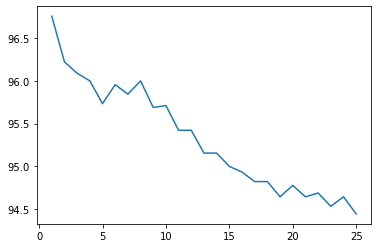

In [131]:
plt.plot(k_range,scores_list)

In [132]:
custom_knn=[[10,500,10,6,4,0.9,0.8,0,6]]

In [133]:
custom_knn_std=sc.transform(custom_knn)

In [134]:
prediction_knn_custom=knn.predict(custom_knn_std)

In [139]:
category[int(prediction_knn_custom)]

'employee will stay'

In [141]:
algorithms = ['Decision tree','KNN']
scores = [accuracy_dt,accuracy_knn]

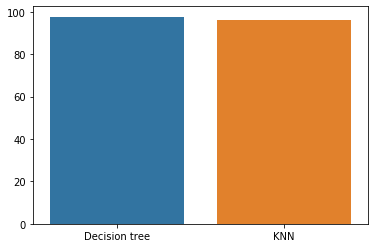

In [142]:
sns.barplot(algorithms,scores)